### Redial-2020 in Jupyter notebook

#### Import libraries

In [1]:
import numpy as np
import pickle
from sklearn.metrics import classification_report, \
accuracy_score, cohen_kappa_score, roc_auc_score
import hypopt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler
from matplotlib import pylab
import glob, os, sys
from matplotlib_venn import venn3, venn3_circles
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

                 data_type  precision_Av  recall_Av  f1_score_Av  auc_Av  \
0        act_fp_val_y_pred         0.747      0.745        0.745   0.745   
1       act_fp_test_y_pred         0.698      0.696        0.695   0.696   
2        act_tp_val_y_pred         0.677      0.676        0.676   0.676   
3       act_tp_test_y_pred         0.647      0.647        0.647   0.647   
4       act_des_val_y_pred         0.725      0.725        0.725   0.725   
5      act_des_test_y_pred         0.609      0.608        0.606   0.608   
6       act_con_val_y_pred         0.795      0.794        0.794   0.794   
7      act_con_test_y_pred         0.727      0.725        0.725   0.725   
8        tox_fp_val_y_pred         0.758      0.755        0.754   0.755   
9       tox_fp_test_y_pred         0.698      0.696        0.695   0.696   
10       tox_tp_val_y_pred         0.727      0.727        0.727   0.727   
11      tox_tp_test_y_pred         0.684      0.684        0.684   0.684   
12      tox_

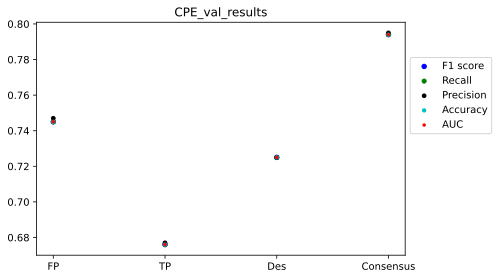

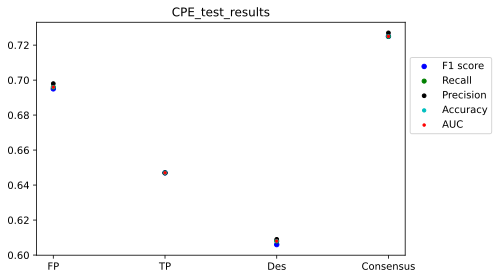

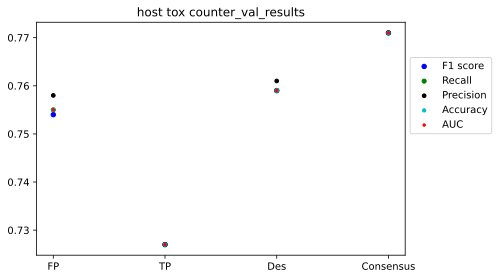

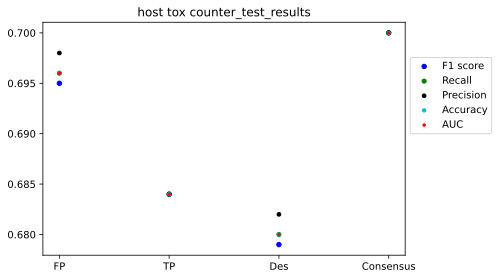

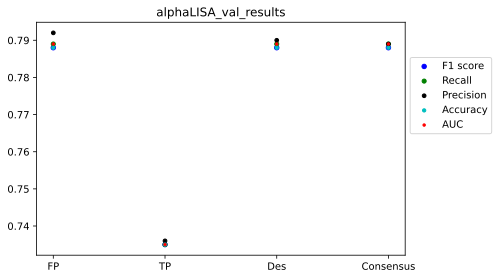

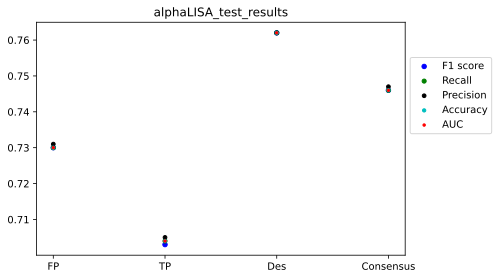

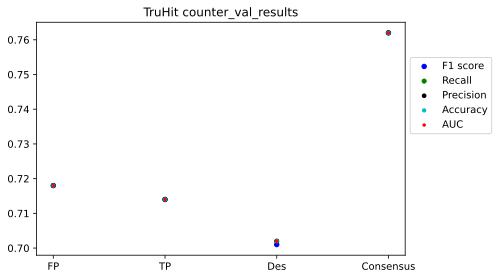

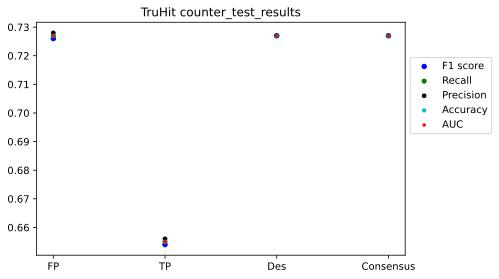

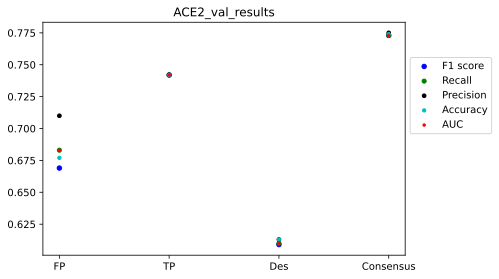

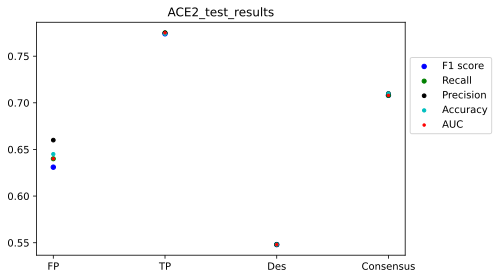

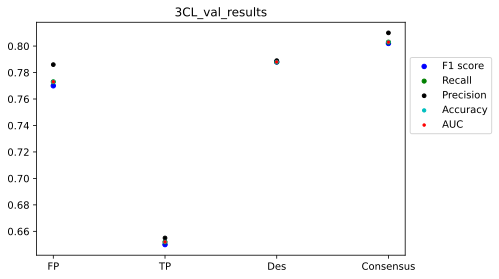

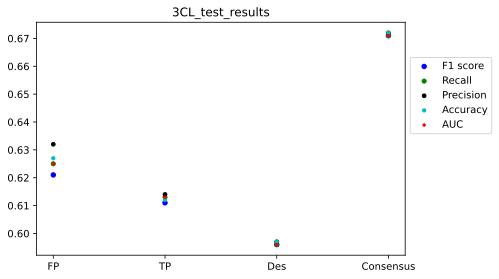

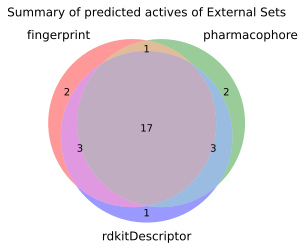

In [2]:
class RunJupyter(object):
    def __init__(self, models_path, files_path, external_set):
        self.models_path = models_path
        self.files_path = files_path
        self.external_set = external_set
        self.data_type, self.precision_Av, self.recall_Av, self.f1_score_Av, \
        self.auc_Av, self.cohen_score, self.accuracy = [], [], [], [], [], [], []
        
    def create_dictn(self):
        # Dicionary of all the models and files paths.
        dictn = dict()
        dictn['act_fp_model'] = self.models_path+'/'+'ActFP-fcfp4-XGBClassifier_best.pkl'
        dictn['act_tp_model'] = self.models_path+'/'+'ActTopo-tpatf-LogisticRegression_best.pkl'
        dictn['act_des_model'] = self.models_path+'/'+'ActDes-rdkDes-ComplementNB_best.pkl'
        dictn['tox_fp_model'] = self.models_path+'/'+'ToxFP-rdk5-KNeighborsClassifier_best.pkl'
        dictn['tox_tp_model'] = self.models_path+'/'+'ToxTopo-tpatf-XGBClassifier_best.pkl'
        dictn['tox_des_model'] = self.models_path+'/'+'ToxDes-rdkDes-MLPClassifier_best.pkl'
        dictn['alpha_fp_model'] = self.models_path+'/'+'AlphaLisaFP-laval-XGBClassifier_best.pkl'
        dictn['alpha_tp_model'] = self.models_path+'/'+'AlphaLisaTopo-tpatf-MLPClassifier_best.pkl'
        dictn['alpha_des_model'] = self.models_path+'/'+'AlphaLisaDes-rdkDes-RandomForestClassifier_best.pkl'
        dictn['truhit_fp_model'] = self.models_path+'/'+'TruHitFP-hashap-XGBClassifier_best.pkl'
        dictn['truhit_tp_model'] = self.models_path+'/'+'TruHitTopo-tpatf-KNeighborsClassifier_best.pkl'
        dictn['truhit_des_model'] = self.models_path+'/'+ 'TruHitDes-rdkDes-MLPClassifier_best.pkl'
        dictn['ace2_fp_model'] = self.models_path+'/'+'ACE2EnzymaticFP-rdk7-ExtraTreeClassifier_best.pkl'
        dictn['ace2_tp_model'] = self.models_path+'/'+ 'ACE2EnzymaticTopo-tpatf-MultinomialNB_best.pkl'
        dictn['ace2_des_model'] = self.models_path+'/'+'ActDes-rdkDes-ComplementNB_best.pkl'
        dictn['3cl_fp_model'] = self.models_path+'/'+'3CLEnzymaticFP-fcfp4-KNeighborsClassifier_best.pkl'
        dictn['3cl_tp_model'] = self.models_path+'/'+'3CLEnzymaticTopo-tpatf-MLPClassifier_best.pkl'
        dictn['3cl_des_model'] = self.models_path+'/'+'3CLEnzymaticDes-rdkDes-ExtraTreeClassifier_best.pkl'
        
        
        dictn['act_fp_val'] = self.files_path+'/'+'fcfp4-ActInact_balanced_randomsplit7_70_15_15_va.npy'
        dictn['act_fp_test'] = self.files_path+'/'+'fcfp4-ActInact_balanced_randomsplit7_70_15_15_te.npy'
        dictn['act_tp_val'] = self.files_path+'/'+'tpatf-ActInact_balanced_randomsplit7_70_15_15_va.npy'
        dictn['act_tp_test'] = self.files_path+'/'+'tpatf-ActInact_balanced_randomsplit7_70_15_15_te.npy'
        dictn['act_des_val'] = self.files_path+'/'+'rdkDes-ActInact_balanced_randomsplit7_70_15_15_va.npy'
        dictn['act_des_test'] = self.files_path+'/'+'rdkDes-ActInact_balanced_randomsplit7_70_15_15_te.npy'

        dictn['tox_fp_val'] = self.files_path+'/'+'rdk5-Tox_balanced_randomsplit7_70_15_15_va.npy'
        dictn['tox_fp_test'] = self.files_path+'/'+'rdk5-Tox_balanced_randomsplit7_70_15_15_te.npy'
        dictn['tox_tp_val'] = self.files_path+'/'+'tpatf-Tox_balanced_randomsplit7_70_15_15_va.npy'
        dictn['tox_tp_test'] = self.files_path+'/'+'tpatf-Tox_balanced_randomsplit7_70_15_15_te.npy'
        dictn['tox_des_val'] = self.files_path+'/'+'rdkDes-Tox_balanced_randomsplit7_70_15_15_va.npy'
        dictn['tox_des_test'] = self.files_path+'/'+'rdkDes-Tox_balanced_randomsplit7_70_15_15_te.npy'
        
        dictn['alpha_fp_val'] = self.files_path+'/'+'laval-AlphaLISA_balanced_randomsplit7_70_15_15_va.npy'
        dictn['alpha_fp_test'] = self.files_path+'/'+'laval-AlphaLISA_balanced_randomsplit7_70_15_15_te.npy'
        dictn['alpha_tp_val'] = self.files_path+'/'+'tpatf-AlphaLISA_balanced_randomsplit7_70_15_15_va.npy'
        dictn['alpha_tp_test'] = self.files_path+'/'+'tpatf-AlphaLISA_balanced_randomsplit7_70_15_15_te.npy'
        dictn['alpha_des_val'] = self.files_path+'/'+'rdkDes-AlphaLISA_balanced_randomsplit7_70_15_15_va.npy'
        dictn['alpha_des_test'] = self.files_path+'/'+'rdkDes-AlphaLISA_balanced_randomsplit7_70_15_15_te.npy'
        
        dictn['truhit_fp_val'] = self.files_path+'/'+'hashap-TruHit_balanced_randomsplit7_70_15_15_va.npy'
        dictn['truhit_fp_test'] = self.files_path+'/'+'hashap-TruHit_balanced_randomsplit7_70_15_15_te.npy'
        dictn['truhit_tp_val'] = self.files_path+'/'+'tpatf-TruHit_balanced_randomsplit7_70_15_15_va.npy'
        dictn['truhit_tp_test'] = self.files_path+'/'+'tpatf-TruHit_balanced_randomsplit7_70_15_15_te.npy'
        dictn['truhit_des_val'] = self.files_path+'/'+'rdkDes-TruHit_balanced_randomsplit7_70_15_15_va.npy'
        dictn['truhit_des_test'] = self.files_path+'/'+'rdkDes-TruHit_balanced_randomsplit7_70_15_15_te.npy'
        
        dictn['ace2_fp_val'] = self.files_path+'/'+'rdk7-ACE2_enzymatic_balanced_randomsplit7_70_15_15_va.npy'
        dictn['ace2_fp_test'] = self.files_path+'/'+'rdk7-ACE2_enzymatic_balanced_randomsplit7_70_15_15_te.npy'
        dictn['ace2_tp_val'] = self.files_path+'/'+'tpatf-ACE2_enzymatic_balanced_randomsplit7_70_15_15_va.npy'
        dictn['ace2_tp_test'] = self.files_path+'/'+'tpatf-ACE2_enzymatic_balanced_randomsplit7_70_15_15_te.npy'
        dictn['ace2_des_val'] = self.files_path+'/'+'rdkDes-ACE2_enzymatic_balanced_randomsplit7_70_15_15_va.npy'
        dictn['ace2_des_test'] = self.files_path+'/'+'rdkDes-ACE2_enzymatic_balanced_randomsplit7_70_15_15_te.npy'
        
        dictn['3cl_fp_val'] = self.files_path+'/'+'fcfp4-3CL_enzymatic_balanced_randomsplit7_70_15_15_va.npy'
        dictn['3cl_fp_test'] = self.files_path+'/'+'fcfp4-3CL_enzymatic_balanced_randomsplit7_70_15_15_te.npy'
        dictn['3cl_tp_val'] = self.files_path+'/'+'tpatf-3CL_enzymatic_balanced_randomsplit7_70_15_15_va.npy'
        dictn['3cl_tp_test'] = self.files_path+'/'+'tpatf-3CL_enzymatic_balanced_randomsplit7_70_15_15_te.npy'
        dictn['3cl_des_val'] = self.files_path+'/'+'rdkDes-3CL_enzymatic_balanced_randomsplit7_70_15_15_va.npy'
        dictn['3cl_des_test'] = self.files_path+'/'+'rdkDes-3CL_enzymatic_balanced_randomsplit7_70_15_15_te.npy'
        
        return dictn
    
    def run_models(self):
        # List of all the models for both activity and toxicity.
        models = glob.glob(self.models_path+'/*.pkl')
        # Initialize the dictionary to store all the predicted labels.
        dictn_results = dict()
        # Call (create) dictonary containing necessary models and features files.
        dictn = self.create_dictn()
        # Load numpy files
        act_test = np.load(dictn['act_fp_test'])
        act_val = np.load(dictn['act_fp_val'])
        tox_test = np.load(dictn['tox_fp_test'])
        tox_val = np.load(dictn['tox_fp_val'])
        alpha_test = np.load(dictn['alpha_fp_test'])
        alpha_val = np.load(dictn['alpha_fp_val'])
        truhit_test = np.load(dictn['truhit_fp_test'])
        truhit_val = np.load(dictn['truhit_fp_val'])
        ace2_test = np.load(dictn['ace2_fp_test'])
        ace2_val = np.load(dictn['ace2_fp_val'])
        cl3_test = np.load(dictn['3cl_fp_test'])
        cl3_val = np.load(dictn['3cl_fp_val'])
        # Get y_true labels that is same for all
        # (since same test/val  was used for all).
        act_y_test = act_test[:, -1]
        act_y_val = act_val[:, -1]
        tox_y_test = tox_test[:, -1]
        tox_y_val = tox_val[:, -1]
        alpha_y_test = alpha_test[:, -1]
        alpha_y_val = alpha_val[:, -1]
        truhit_y_test = truhit_test[:, -1]
        truhit_y_val = truhit_val[:, -1]
        ace2_y_test = ace2_test[:, -1]
        ace2_y_val = ace2_val[:, -1]
        cl3_y_test = cl3_test[:, -1]
        cl3_y_val = cl3_val[:, -1]
        
        act_fp_val = np.load(dictn['act_fp_val'])
        act_fp_test = np.load(dictn['act_fp_test'])
        act_tp_val = np.load(dictn['act_tp_val'])
        act_tp_test = np.load(dictn['act_tp_test'])
        act_des_val = np.load(dictn['act_des_val'])
        act_des_test = np.load(dictn['act_des_test'])

        tox_fp_val = np.load(dictn['tox_fp_val'])
        tox_fp_test = np.load(dictn['tox_fp_test'])
        tox_tp_val = np.load(dictn['tox_tp_val'])
        tox_tp_test = np.load(dictn['tox_tp_test'])
        tox_des_val = np.load(dictn['tox_des_val'])
        tox_des_test = np.load(dictn['tox_des_test'])
        
        alpha_fp_val = np.load(dictn['alpha_fp_val'])
        alpha_fp_test = np.load(dictn['alpha_fp_test'])
        alpha_tp_val = np.load(dictn['alpha_tp_val'])
        alpha_tp_test = np.load(dictn['alpha_tp_test'])
        alpha_des_val = np.load(dictn['alpha_des_val'])
        alpha_des_test = np.load(dictn['alpha_des_test'])
        
        truhit_fp_val = np.load(dictn['truhit_fp_val'])
        truhit_fp_test = np.load(dictn['truhit_fp_test'])
        truhit_tp_val = np.load(dictn['truhit_tp_val'])
        truhit_tp_test = np.load(dictn['truhit_tp_test'])        
        truhit_des_val = np.load(dictn['truhit_des_val'])
        truhit_des_test = np.load(dictn['truhit_des_test'])
        
        ace2_fp_val = np.load(dictn['ace2_fp_val'])
        ace2_fp_test = np.load(dictn['ace2_fp_test'])
        ace2_tp_val = np.load(dictn['ace2_tp_val'])
        ace2_tp_test = np.load(dictn['ace2_tp_test']) 
        ace2_des_val = np.load(dictn['ace2_des_val'])
        ace2_des_test = np.load(dictn['ace2_des_test'])
        
        cl3_fp_val = np.load(dictn['3cl_fp_val'])
        cl3_fp_test = np.load(dictn['3cl_fp_test'])
        cl3_tp_val = np.load(dictn['3cl_tp_val'])
        cl3_tp_test = np.load(dictn['3cl_tp_test']) 
        cl3_des_val = np.load(dictn['3cl_des_val'])
        cl3_des_test = np.load(dictn['3cl_des_test'])
        
        # Load models and predict
        # For activity
        act_fp_val_y_pred = pickle.load(open(dictn['act_fp_model'], 'rb')).predict(act_fp_val[:, :-1])
        act_fp_test_y_pred = pickle.load(open(dictn['act_fp_model'], 'rb')).predict(act_fp_test[:, :-1])
        act_tp_val_y_pred = pickle.load(open(dictn['act_tp_model'], 'rb')).predict(act_tp_val[:, :-1])
        act_tp_test_y_pred = pickle.load(open(dictn['act_tp_model'], 'rb')).predict(act_tp_test[:, :-1])
        act_des_val_y_pred = pickle.load(open(dictn['act_des_model'], 'rb')).predict(act_des_val[:, :-1])
        act_des_test_y_pred = pickle.load(open(dictn['act_des_model'], 'rb')).predict(act_des_test[:, :-1])
         
        # For toxicity
        tox_fp_val_y_pred = pickle.load(open(dictn['tox_fp_model'],'rb')).predict(tox_fp_val[:, :-1])
        tox_fp_test_y_pred = pickle.load(open(dictn['tox_fp_model'], 'rb')).predict(tox_fp_test[:, :-1])
        tox_tp_val_y_pred = pickle.load(open(dictn['tox_tp_model'], 'rb')).predict(tox_tp_val[:, :-1])
        tox_tp_test_y_pred = pickle.load(open(dictn['tox_tp_model'], 'rb')).predict(tox_tp_test[:, :-1])
        tox_des_val_y_pred = pickle.load(open(dictn['tox_des_model'], 'rb')).predict(tox_des_val[:, :-1])
        tox_des_test_y_pred = pickle.load(open(dictn['tox_des_model'], 'rb')).predict(tox_des_test[:, :-1])

        # For alphaLISA
        alpha_fp_val_y_pred = pickle.load(open(dictn['alpha_fp_model'],'rb')).predict(alpha_fp_val[:, :-1])
        alpha_fp_test_y_pred = pickle.load(open(dictn['alpha_fp_model'], 'rb')).predict(alpha_fp_test[:, :-1])
        alpha_tp_val_y_pred = pickle.load(open(dictn['alpha_tp_model'], 'rb')).predict(alpha_tp_val[:, :-1])
        alpha_tp_test_y_pred = pickle.load(open(dictn['alpha_tp_model'], 'rb')).predict(alpha_tp_test[:, :-1])
        alpha_des_val_y_pred = pickle.load(open(dictn['alpha_des_model'], 'rb')).predict(alpha_des_val[:, :-1])
        alpha_des_test_y_pred = pickle.load(open(dictn['alpha_des_model'], 'rb')).predict(alpha_des_test[:, :-1])
        
        # For TruHit
        truhit_fp_val_y_pred = pickle.load(open(dictn['truhit_fp_model'],'rb')).predict(truhit_fp_val[:, :-1])
        truhit_fp_test_y_pred = pickle.load(open(dictn['truhit_fp_model'], 'rb')).predict(truhit_fp_test[:, :-1])
        truhit_tp_val_y_pred = pickle.load(open(dictn['truhit_tp_model'], 'rb')).predict(truhit_tp_val[:, :-1])
        truhit_tp_test_y_pred = pickle.load(open(dictn['truhit_tp_model'], 'rb')).predict(truhit_tp_test[:, :-1])
        truhit_des_val_y_pred = pickle.load(open(dictn['truhit_des_model'], 'rb')).predict(truhit_des_val[:, :-1])
        truhit_des_test_y_pred = pickle.load(open(dictn['truhit_des_model'], 'rb')).predict(truhit_des_test[:, :-1])
        
        # For ACE2
        ace2_fp_val_y_pred = pickle.load(open(dictn['ace2_fp_model'],'rb')).predict(ace2_fp_val[:, :-1])
        ace2_fp_test_y_pred = pickle.load(open(dictn['ace2_fp_model'], 'rb')).predict(ace2_fp_test[:, :-1])
        ace2_tp_val_y_pred = pickle.load(open(dictn['ace2_tp_model'], 'rb')).predict(ace2_tp_val[:, :-1])
        ace2_tp_test_y_pred = pickle.load(open(dictn['ace2_tp_model'], 'rb')).predict(ace2_tp_test[:, :-1])
        ace2_des_val_y_pred = pickle.load(open(dictn['ace2_des_model'], 'rb')).predict(ace2_des_val[:, :-1])
        ace2_des_test_y_pred = pickle.load(open(dictn['ace2_des_model'], 'rb')).predict(ace2_des_test[:, :-1])
        
        # For 3CL
        cl3_fp_val_y_pred = pickle.load(open(dictn['3cl_fp_model'],'rb')).predict(cl3_fp_val[:, :-1])
        cl3_fp_test_y_pred = pickle.load(open(dictn['3cl_fp_model'], 'rb')).predict(cl3_fp_test[:, :-1])
        cl3_tp_val_y_pred = pickle.load(open(dictn['3cl_tp_model'], 'rb')).predict(cl3_tp_val[:, :-1])
        cl3_tp_test_y_pred = pickle.load(open(dictn['3cl_tp_model'], 'rb')).predict(cl3_tp_test[:, :-1])
        cl3_des_val_y_pred = pickle.load(open(dictn['3cl_des_model'], 'rb')).predict(cl3_des_val[:, :-1])
        cl3_des_test_y_pred = pickle.load(open(dictn['3cl_des_model'], 'rb')).predict(cl3_des_test[:, :-1])
        # Getting consensus using all three
        act_con_val_y_pred = []
        act_con_test_y_pred = []
        tox_con_val_y_pred = []
        tox_con_test_y_pred = []
        alpha_con_val_y_pred = []
        alpha_con_test_y_pred = []
        truhit_con_val_y_pred = []
        truhit_con_test_y_pred = []
        ace2_con_val_y_pred = []
        ace2_con_test_y_pred = []
        cl3_con_val_y_pred = []
        cl3_con_test_y_pred = []
        
        # For activity model
        for p,q,r in zip(act_fp_val_y_pred, act_tp_val_y_pred, act_des_val_y_pred):
            if sum([p,q,r]) >=2.0:
                act_con_val_y_pred.append(1.0)
            else:
                act_con_val_y_pred.append(0.0)  

        for p,q,r in zip(act_fp_test_y_pred, act_tp_test_y_pred, act_des_test_y_pred):
            if sum([p,q,r]) >=2.0:
                act_con_test_y_pred.append(1.0)
            else:
                act_con_test_y_pred.append(0.0)
        # For toxicity model
        for p,q,r in zip(tox_fp_val_y_pred, tox_tp_val_y_pred, tox_des_val_y_pred):
            if sum([p,q,r]) >=2.0:
                tox_con_val_y_pred.append(1.0)
            else:
                tox_con_val_y_pred.append(0.0) 

        for p,q,r in zip(tox_fp_test_y_pred, tox_tp_test_y_pred, tox_des_test_y_pred):
            if sum([p,q,r]) >=2.0:
                tox_con_test_y_pred.append(1.0)
            else:
                tox_con_test_y_pred.append(0.0)
                
        for p,q,r in zip(alpha_fp_val_y_pred, alpha_tp_val_y_pred, alpha_des_val_y_pred):
            if sum([p,q,r]) >=2.0:
                alpha_con_val_y_pred.append(1.0)
            else:
                alpha_con_val_y_pred.append(0.0) 

        for p,q,r in zip(alpha_fp_test_y_pred, alpha_tp_test_y_pred, alpha_des_test_y_pred):
            if sum([p,q,r]) >=2.0:
                alpha_con_test_y_pred.append(1.0)
            else:
                alpha_con_test_y_pred.append(0.0)
                
        for p,q,r in zip(truhit_fp_val_y_pred, truhit_tp_val_y_pred, truhit_des_val_y_pred):
            if sum([p,q,r]) >=2.0:
                truhit_con_val_y_pred.append(1.0)
            else:
                truhit_con_val_y_pred.append(0.0) 

        for p,q,r in zip(truhit_fp_test_y_pred, truhit_tp_test_y_pred, truhit_des_test_y_pred):
            if sum([p,q,r]) >=2.0:
                truhit_con_test_y_pred.append(1.0)
            else:
                truhit_con_test_y_pred.append(0.0)
                
        for p,q,r in zip(ace2_fp_val_y_pred, ace2_tp_val_y_pred, ace2_des_val_y_pred):
            if sum([p,q,r]) >=2.0:
                ace2_con_val_y_pred.append(1.0)
            else:
                ace2_con_val_y_pred.append(0.0) 

        for p,q,r in zip(ace2_fp_test_y_pred, ace2_tp_test_y_pred, ace2_des_test_y_pred):
            if sum([p,q,r]) >=2.0:
                ace2_con_test_y_pred.append(1.0)
            else:
                ace2_con_test_y_pred.append(0.0)
                
        for p,q,r in zip(cl3_fp_val_y_pred, cl3_tp_val_y_pred, cl3_des_val_y_pred):
            if sum([p,q,r]) >=2.0:
                cl3_con_val_y_pred.append(1.0)
            else:
                cl3_con_val_y_pred.append(0.0) 

        for p,q,r in zip(cl3_fp_test_y_pred, cl3_tp_test_y_pred, cl3_des_test_y_pred):
            if sum([p,q,r]) >=2.0:
                cl3_con_test_y_pred.append(1.0)
            else:
                cl3_con_test_y_pred.append(0.0)
                
        # Dictionary of all the true and predicted results.
        dictn_results['act_y_test'] = act_y_test
        dictn_results['act_y_val'] = act_y_val
        dictn_results['tox_y_test'] = tox_y_test
        dictn_results['tox_y_val'] = tox_y_val
        dictn_results['alpha_y_test'] = alpha_y_test
        dictn_results['alpha_y_val'] = alpha_y_val
        dictn_results['truhit_y_test'] = truhit_y_test
        dictn_results['truhit_y_val'] = truhit_y_val
        dictn_results['ace2_y_test'] = ace2_y_test
        dictn_results['ace2_y_val'] = ace2_y_val
        dictn_results['3cl_y_test'] = cl3_y_test
        dictn_results['3cl_y_val'] = cl3_y_val
        
        dictn_results['act_fp_val_y_pred'] = act_fp_val_y_pred
        dictn_results['act_fp_test_y_pred'] = act_fp_test_y_pred
        dictn_results['act_tp_val_y_pred'] = act_tp_val_y_pred
        dictn_results['act_tp_test_y_pred'] = act_tp_test_y_pred
        dictn_results['act_des_val_y_pred'] = act_des_val_y_pred
        dictn_results['act_des_test_y_pred'] = act_des_test_y_pred
        dictn_results['act_con_val_y_pred'] = act_con_val_y_pred
        dictn_results['act_con_test_y_pred'] = act_con_test_y_pred
        
        dictn_results['tox_fp_val_y_pred'] = tox_fp_val_y_pred
        dictn_results['tox_fp_test_y_pred'] = tox_fp_test_y_pred
        dictn_results['tox_tp_val_y_pred'] = tox_tp_val_y_pred
        dictn_results['tox_tp_test_y_pred'] = tox_tp_test_y_pred
        dictn_results['tox_des_val_y_pred'] = tox_des_val_y_pred
        dictn_results['tox_des_test_y_pred'] = tox_des_test_y_pred
        dictn_results['tox_con_val_y_pred'] = tox_con_val_y_pred
        dictn_results['tox_con_test_y_pred'] = tox_con_test_y_pred
        
        dictn_results['alpha_fp_val_y_pred'] = alpha_fp_val_y_pred
        dictn_results['alpha_fp_test_y_pred'] = alpha_fp_test_y_pred
        dictn_results['alpha_tp_val_y_pred'] = alpha_tp_val_y_pred
        dictn_results['alpha_tp_test_y_pred'] = alpha_tp_test_y_pred
        dictn_results['alpha_des_val_y_pred'] = alpha_des_val_y_pred
        dictn_results['alpha_des_test_y_pred'] = alpha_des_test_y_pred
        dictn_results['alpha_con_val_y_pred'] = alpha_con_val_y_pred
        dictn_results['alpha_con_test_y_pred'] = alpha_con_test_y_pred
        
        dictn_results['truhit_fp_val_y_pred'] = truhit_fp_val_y_pred
        dictn_results['truhit_fp_test_y_pred'] = truhit_fp_test_y_pred
        dictn_results['truhit_tp_val_y_pred'] = truhit_tp_val_y_pred
        dictn_results['truhit_tp_test_y_pred'] = truhit_tp_test_y_pred
        dictn_results['truhit_des_val_y_pred'] = truhit_des_val_y_pred
        dictn_results['truhit_des_test_y_pred'] = truhit_des_test_y_pred
        dictn_results['truhit_con_val_y_pred'] = truhit_con_val_y_pred
        dictn_results['truhit_con_test_y_pred'] = truhit_con_test_y_pred
        
        dictn_results['ace2_fp_val_y_pred'] = ace2_fp_val_y_pred
        dictn_results['ace2_fp_test_y_pred'] = ace2_fp_test_y_pred
        dictn_results['ace2_tp_val_y_pred'] = ace2_tp_val_y_pred
        dictn_results['ace2_tp_test_y_pred'] = ace2_tp_test_y_pred
        dictn_results['ace2_des_val_y_pred'] = ace2_des_val_y_pred
        dictn_results['ace2_des_test_y_pred'] = ace2_des_test_y_pred
        dictn_results['ace2_con_val_y_pred'] = ace2_con_val_y_pred
        dictn_results['ace2_con_test_y_pred'] = ace2_con_test_y_pred
        
        dictn_results['3cl_fp_val_y_pred'] = cl3_fp_val_y_pred
        dictn_results['3cl_fp_test_y_pred'] = cl3_fp_test_y_pred
        dictn_results['3cl_tp_val_y_pred'] = cl3_tp_val_y_pred
        dictn_results['3cl_tp_test_y_pred'] = cl3_tp_test_y_pred
        dictn_results['3cl_des_val_y_pred'] = cl3_des_val_y_pred
        dictn_results['3cl_des_test_y_pred'] = cl3_des_test_y_pred
        dictn_results['3cl_con_val_y_pred'] = cl3_con_val_y_pred
        dictn_results['3cl_con_test_y_pred'] = cl3_con_test_y_pred

        return dictn_results
    
    def roc_auc_score_multiclass(self, actual_class, pred_class, average = "macro"):

        #creating a set of all the unique classes using the actual class list
        unique_class = set(actual_class)
        roc_auc_dict = {}
        for per_class in unique_class:
            #creating a list of all the classes except the current class
            other_class = [x for x in unique_class if x != per_class]

            #marking the current class as 1 and all other classes as 0
            new_actual_class = [0 if x in other_class else 1 for x in actual_class]
            new_pred_class = [0 if x in other_class else 1 for x in pred_class]

            #using the sklearn metrics method to calculate the roc_auc_score
            roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
            roc_auc_dict[per_class] = roc_auc

        return roc_auc_dict
    # This function is used to get the average of 0 and 1 results.
    def calculate_av_scores(self, y_true, y_pred):
        class_rep = classification_report(y_true, y_pred, output_dict = True)
        self.precision_Av.append(round((class_rep['0.0']['precision']+class_rep['1.0']['precision'])/2, 3))
        self.recall_Av.append(round((class_rep['0.0']['recall']+class_rep['1.0']['recall'])/2, 3))
        self.f1_score_Av.append(round((class_rep['0.0']['f1-score']+class_rep['1.0']['f1-score'])/2, 3))
        auc_outputs = self.roc_auc_score_multiclass(y_true, y_pred)
        self.auc_Av.append(round((auc_outputs[0]+auc_outputs[1])/2, 3))
        self.accuracy.append(round(accuracy_score(y_true, y_pred), 3))
        self.cohen_score.append(round(cohen_kappa_score(y_true, y_pred), 3))
            
    def get_results(self):
        # Call models to get predictions.
        predictions = self.run_models()
        # Keys are all the splits of activity and toxicity models
        keys = list(predictions.keys())
        # Get true values from dictionary 
        act_y_val = predictions['act_y_val']
        act_y_test = predictions['act_y_test']
        tox_y_val = predictions['tox_y_val']
        tox_y_test = predictions['tox_y_test']
        alpha_y_val = predictions['alpha_y_val']
        alpha_y_test = predictions['alpha_y_test']
        truhit_y_val = predictions['truhit_y_val']
        truhit_y_test = predictions['truhit_y_test']
        ace2_y_val = predictions['ace2_y_val']
        ace2_y_test = predictions['ace2_y_test']
        cl3_y_val = predictions['3cl_y_val']
        cl3_y_test = predictions['3cl_y_test']        
        
        # Use of loop to get overall results
        for k in keys:
            if k=='act_fp_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(act_y_val, predictions[k])
            elif k=='act_fp_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(act_y_test, predictions[k])
            elif k=='act_tp_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(act_y_val, predictions[k])
            elif k=='act_tp_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(act_y_test, predictions[k])
            elif k=='act_des_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(act_y_val, predictions[k])
            elif k=='act_des_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(act_y_test, predictions[k])
            elif k=='act_con_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(act_y_val, predictions[k])
            elif k=='act_con_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(act_y_test, predictions[k])

            if k=='tox_fp_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(tox_y_val, predictions[k])
            elif k=='tox_fp_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(tox_y_test, predictions[k])
            elif k=='tox_tp_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(tox_y_val, predictions[k])
            elif k=='tox_tp_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(tox_y_test, predictions[k])
            elif k=='tox_des_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(tox_y_val, predictions[k])
            elif k=='tox_des_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(tox_y_test, predictions[k])
            elif k=='tox_con_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(tox_y_val, predictions[k])
            elif k=='tox_con_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(tox_y_test, predictions[k])

            if k=='alpha_fp_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(alpha_y_val, predictions[k])
            elif k=='alpha_fp_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(alpha_y_test, predictions[k])
            elif k=='alpha_tp_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(alpha_y_val, predictions[k])
            elif k=='alpha_tp_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(alpha_y_test, predictions[k])
            elif k=='alpha_des_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(alpha_y_val, predictions[k])
            elif k=='alpha_des_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(alpha_y_test, predictions[k])
            elif k=='alpha_con_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(alpha_y_val, predictions[k])
            elif k=='alpha_con_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(alpha_y_test, predictions[k])
                
            if k=='truhit_fp_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(truhit_y_val, predictions[k])
            elif k=='truhit_fp_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(truhit_y_test, predictions[k])
            elif k=='truhit_tp_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(truhit_y_val, predictions[k])
            elif k=='truhit_tp_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(truhit_y_test, predictions[k])
            elif k=='truhit_des_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(truhit_y_val, predictions[k])
            elif k=='truhit_des_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(truhit_y_test, predictions[k])
            elif k=='truhit_con_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(truhit_y_val, predictions[k])
            elif k=='truhit_con_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(truhit_y_test, predictions[k])
    
            if k=='ace2_fp_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(ace2_y_val, predictions[k])
            elif k=='ace2_fp_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(ace2_y_test, predictions[k])
            elif k=='ace2_tp_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(ace2_y_val, predictions[k])
            elif k=='ace2_tp_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(ace2_y_test, predictions[k])
            elif k=='ace2_des_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(ace2_y_val, predictions[k])
            elif k=='ace2_des_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(ace2_y_test, predictions[k])
            elif k=='ace2_con_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(ace2_y_val, predictions[k])
            elif k=='ace2_con_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(ace2_y_test, predictions[k])

            if k=='3cl_fp_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(cl3_y_val, predictions[k])
            elif k=='3cl_fp_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(cl3_y_test, predictions[k])
            elif k=='3cl_tp_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(cl3_y_val, predictions[k])
            elif k=='3cl_tp_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(cl3_y_test, predictions[k])
            elif k=='3cl_des_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(cl3_y_val, predictions[k])
            elif k=='3cl_des_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(cl3_y_test, predictions[k])
            elif k=='3cl_con_val_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(cl3_y_val, predictions[k])
            elif k=='3cl_con_test_y_pred':
                self.data_type.append(k)
                self.calculate_av_scores(cl3_y_test, predictions[k])

    def make_dataFrame(self):
        cols = ['data_type', 'precision_Av', 'recall_Av', 'f1_score_Av', 'auc_Av', 'cohen_score', 'accuracy']
        df = pd.DataFrame(list(zip(self.data_type, self.precision_Av, self.recall_Av, self.f1_score_Av, \
        self.auc_Av, self.cohen_score, self.accuracy)), columns = cols)
        return df
    # plot validation and test sets results.
    def plot_results(self):      
        model_types = ['CPE', 'host tox counter', 'alphaLISA', 'TruHit counter', 'ACE2', '3CL']
        df = self.make_dataFrame()
        # Print the results in DataFrame
        print(df)
        df_act = df.iloc[:8]
        df_tox = df.iloc[8:16]
        df_alpha = df.iloc[16:24]
        df_truhit = df.iloc[24:32]
        df_ace2 = df.iloc[32:40]
        df_3cl = df.iloc[40:len(df)]
        df_act_tox = [df_act, df_tox, df_alpha, df_truhit, df_ace2, df_3cl]
        for m, df in zip(model_types, df_act_tox):
            df_val = df.iloc[::2] # Even row
            df_test = df.iloc[1::2] # odd row
            df_val_test = [df_val, df_test]
            
            split_type = ['val', 'test']
            for s, df in zip(split_type, df_val_test):
                F1 = df['f1_score_Av'].to_list()
                Precision = df['precision_Av'].to_list()
                Recall = df['recall_Av'].to_list()
                Accuracy = df['accuracy'].to_list()
                roc = df['auc_Av'].to_list()
                models = ['FP', 'TP', 'Des', 'Consensus']
                plt.rc('xtick',labelsize=10)
                plt.scatter(models, F1, c='b',s=20, label='F1 score')
                plt.scatter(models, Recall, c='g',s=17, label='Recall')
                plt.scatter(models, Precision, c='k',s=14, label='Precision')
                plt.scatter(models, Accuracy, c='c',s=11, label='Accuracy')
                plt.scatter(models, roc, c='r',s=6, label='AUC')
                plt.title(m+'_'+s+'_results')
                plt.tight_layout()
                plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
                plt.show()
    def plot_venn_diagram(self):
        def get_venn_sections(sets):
            num_combinations = 2 ** len(sets)
            bit_flags = [2 ** n for n in range(len(sets))]
            flags_zip_sets = [z for z in zip(bit_flags, sets)]

            combo_sets = []
            for bits in range(num_combinations - 1, 0, -1):
                include_sets = [s for flag, s in flags_zip_sets if bits & flag]
                exclude_sets = [s for flag, s in flags_zip_sets if not bits & flag]
                combo = set.intersection(*include_sets)
                combo = set.difference(combo, *exclude_sets)
                tag = ''.join([str(int((bits & flag) > 0)) for flag in bit_flags])
                combo_sets.append((tag, combo))
            return combo_sets
        df1 = pd.read_csv(self.external_set+'/activity_external_set.csv')
        pred_csv1_0_indices = [index for index, element in enumerate(df1['model_fcfp4'].to_list()) if element == 0]
        pred_csv1_1_indices = [index for index, element in enumerate(df1['model_fcfp4'].to_list()) if element == 1]

        pred_csv2_0_indices = [index for index, element in enumerate(df1['model_tpatf'].to_list()) if element == 0]
        pred_csv2_1_indices = [index for index, element in enumerate(df1['model_tpatf'].to_list()) if element == 1]

        pred_csv3_0_indices = [index for index, element in enumerate(df1['model_rdkDes'].to_list()) if element == 0]
        pred_csv3_1_indices = [index for index, element in enumerate(df1['model_rdkDes'].to_list()) if element == 1]

        get_common = get_venn_sections([set(pred_csv1_1_indices), set(pred_csv2_1_indices), set(pred_csv3_1_indices)])
        venn3([set(pred_csv1_1_indices), set(pred_csv2_1_indices), set(pred_csv3_1_indices)], set_labels= \
              ['fingerprint', 'pharmacophore', 'rdkitDescriptor'])
        plt.title('Summary of predicted actives of External Sets')
        plt.show()

if __name__ == '__main__':
    rj = RunJupyter('../saved_models', 'test_val_sets', 'external_set')
    rj.get_results()
    rj.make_dataFrame()
    rj.plot_results()
    rj.plot_venn_diagram()